# GaussianNB with Python


- Titanic_train.csv: data and labels
- Titanic_test.csv: only data



https://www.kaggle.com/c/titanic/data


- Survived: Survived (1) or died (0)
- Pclass: Passenger’s class
- Name: Passenger’s name
- Sex: Passenger’s sex
- Age: Passenger’s age
- SibSp: Number of siblings/spouses aboard
- Parch: Number of parents/children aboard
- Ticket: Ticket number
- Fare: Fare
- Cabin: Cabin
- Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)



In [197]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

In [198]:
# Loading the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Store our test passenger IDs for easy access
PassengerId = test['PassengerId']



## 1) Data Exploration

In [199]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [200]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [201]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [202]:
type(train)

pandas.core.frame.DataFrame

In [203]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [204]:
train.describe(include=['object', 'bool'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Andersson, Miss. Ebba Iris Alfrida",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


## 2) Data processing:

In [205]:
# điền dữ liệu cho các ô bị thiếu
train.fillna(-1,inplace = True)
test.fillna(-1, inplace = True)

In [206]:
# Cabin & ticket has a lot of unique values => won't improve model => remove
train.drop(["Cabin"], axis = 1, inplace = True)
test.drop(["Cabin"], axis = 1, inplace = True)
train.drop(["Ticket"], axis = 1, inplace = True)
test.drop(["Ticket"], axis = 1, inplace = True)

In [207]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


<AxesSubplot:>

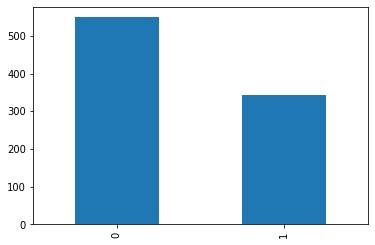

In [208]:
# checking class distribution
train["Survived"].value_counts().plot(kind = "bar")

C:\Users\Test\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:title={'center':'Not Survived'}, xlabel='Pclass'>

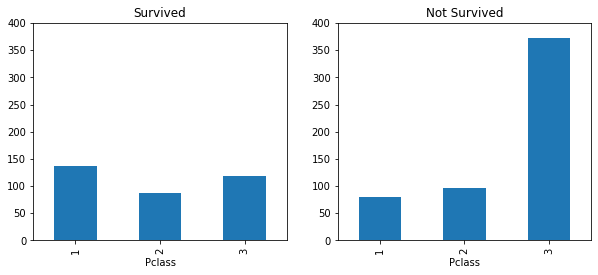

In [209]:
#Now checking class distribution of pclass, i.e., how many people from each class survived.
df_survived = train[train["Survived"]==1]
df_notsurvived = train[train["Survived"]==0]
gb_pclass_surv = df_survived.groupby("Pclass")["Survived"].sum()
#a = gb_pclass_surv.plot(kind= "bar")
gb_pclass_notsurv = df_notsurvived.groupby("Pclass")["Survived"].count()
#b = gb_pclass_notsurv.plot(kind= "bar")

fig = plt.figure(figsize = (10,4))
f1 = fig.add_subplot(1, 2, 1)
f1.set_ylim([0,400])
f2 = fig.add_subplot(1,2,2)
f2.set_ylim([0,400])
gb_pclass_surv.plot(kind= "bar", title = "Survived", ax = f1)
gb_pclass_notsurv.plot(kind= "bar", title = "Not Survived", ax = f2)

Most of the people from class 3 didn't survive while nearly equal no. of people from the 2nd class did and did not survive, while more people of the 1st class survived as compared to non survival rate, thus pclass is an important data for training the classifier.

In [210]:
#data PassengerId isn't important
train.drop("PassengerId", axis = 1, inplace = True)
test.drop("PassengerId", axis = 1, inplace = True)

In [211]:
#change data in sex and Embarked to int
train["Sex"].replace("male", 0, inplace = True)
test["Sex"].replace("male", 0, inplace = True)
train["Sex"].replace("female", 1, inplace = True)
test["Sex"].replace("female", 1, inplace = True)

train["Embarked"].replace(["S","C","Q"],[0,1,2], inplace = True)
test["Embarked"].replace(["S","C","Q"],[0,1,2], inplace = True)

In [212]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0


In [213]:
#Using the parch and sibsp column we can make a new 
#column named no. of family members onboard (n_fam_mem)
train["n_fam_mem"] = train["SibSp"] + train["Parch"]
test["n_fam_mem"] = test["SibSp"] + test["Parch"]

In [214]:
train.drop(["SibSp"],axis = 1 ,inplace = True)
train.drop(["Parch"],axis = 1 ,inplace = True)

In [215]:
train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,n_fam_mem
0,0,3,"Braund, Mr. Owen Harris",0,22.0,7.2500,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,7.9250,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,0,1
4,0,3,"Allen, Mr. William Henry",0,35.0,8.0500,0,0


In [216]:
def age_to_int(train):
    agelist = train["Age"].values.tolist()
    for i in range(len(agelist)):
        if agelist[i] < 18 and agelist[i] >= 0:
            agelist[i] = 0
        elif agelist[i] >= 18 and agelist[i] < 60:
            agelist[i] = 1
        elif agelist[i]>=60 and agelist[i]<200:
            agelist[i] = 2
        else:
            agelist[i] = -1
    ageint = pd.DataFrame(agelist)
    return ageint
ageint = age_to_int(train)
train["Ageint"] = ageint
train.drop("Age", axis = 1, inplace = True)

test_ageint = age_to_int(test)
test["Ageint"] = test_ageint
test.drop("Age", axis = 1, inplace = True)

train["actual_fare"] = train["Fare"]/(train["n_fam_mem"]+1)

test["actual_fare"] = test["Fare"]/(test["n_fam_mem"]+1)
def conv_fare_ranges(train): 
    fare_ranges = []
    for fare in train.actual_fare:
        if fare < 7:
            fare_ranges.append(0)
        elif fare >=7 and fare < 14:
            fare_ranges.append(1)
        elif fare >=14 and fare < 30:
            fare_ranges.append(2)
        elif fare >=30 and fare < 50:
            fare_ranges.append(3)
        elif fare >=50:
            fare_ranges.append(4)
    return fare_ranges
        
fare_ranges = conv_fare_ranges(train)
train["fare_ranges"] = fare_ranges

test_fare_ranges = conv_fare_ranges(test)
test["fare_ranges"] = test_fare_ranges

In [217]:
train.drop(["Name","Fare","actual_fare"], axis = 1, inplace = True)
test.drop(["Name","Fare","actual_fare"], axis = 1, inplace = True)
train.head()

,Survived,Pclass,Sex,Embarked,n_fam_mem,Ageint,fare_ranges
0,0,3,0,0,1,1,0
1,1,1,1,1,1,1,3
2,1,3,1,0,0,1,1
3,1,1,1,0,1,1,2
4,0,3,0,0,0,1,1


## 3)GauusianNBClassifier

In [218]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
clf = GaussianNB()
# fit it to training data
labels = train["Survived"]
data = train.drop("Survived", axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size = 0.1)
clf.fit(X_train,Y_train)
clf

GaussianNB()

In [219]:
# predict using test data
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0], dtype=int64)

In [220]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = clf.predict_proba(X_test)
y_pred_prob

array([[2.37245716e-01, 7.62754284e-01],
       [9.87844871e-01, 1.21551287e-02],
       [8.65327439e-01, 1.34672561e-01],
       [8.90077368e-01, 1.09922632e-01],
       [9.33716264e-01, 6.62837355e-02],
       [9.33716264e-01, 6.62837355e-02],
       [5.09828319e-01, 4.90171681e-01],
       [9.33716264e-01, 6.62837355e-02],
       [2.66859310e-01, 7.33140690e-01],
       [4.16829367e-02, 9.58317063e-01],
       [8.65327439e-01, 1.34672561e-01],
       [9.33716264e-01, 6.62837355e-02],
       [1.48882955e-03, 9.98511170e-01],
       [9.97494523e-01, 2.50547670e-03],
       [2.59095964e-01, 7.40904036e-01],
       [1.42389660e-01, 8.57610340e-01],
       [9.07159620e-01, 9.28403798e-02],
       [9.33716264e-01, 6.62837355e-02],
       [9.33716264e-01, 6.62837355e-02],
       [8.65327439e-01, 1.34672561e-01],
       [9.23296603e-01, 7.67033972e-02],
       [2.81275259e-01, 7.18724741e-01],
       [1.93232432e-01, 8.06767568e-01],
       [8.65327439e-01, 1.34672561e-01],
       [8.388376

In [221]:
#Evaluation
train_pred = clf.predict(X_train)
print('train-set confusion matrix:\n', confusion_matrix(Y_train,train_pred)) 

train-set confusion matrix:
 [[390 102]
 [ 68 241]]


In [222]:
print('test-set confusion matrix:\n', confusion_matrix(Y_test,y_pred)) 
print("recall score: ", recall_score(Y_test,y_pred))

test-set confusion matrix:
 [[46 11]
 [ 9 24]]
recall score:  0.7272727272727273


In [223]:
print("precision score: ", precision_score(Y_test,y_pred))
print("f1 score: ", f1_score(Y_test,y_pred))

precision score:  0.6857142857142857
f1 score:  0.7058823529411764


In [224]:
print("accuracy score: ", accuracy_score(Y_test,y_pred))

accuracy score:  0.7777777777777778
